In [108]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [79]:
Var_gene = pd.read_table("./VariCarta_Autism_gene.tsv")
SFARI = pd.read_csv("./SFARI-Gene.csv")
Mine_gene = pd.read_table("Gene.txt", sep = '\t')

Var_gene = Var_gene[['gene_symbol', 'chromosome']]
SFARI = SFARI[['gene-symbol', 'gene-score']]

In [80]:
Merge = pd.merge(SFARI, Var_gene, left_on = 'gene-symbol', right_on = 'gene_symbol')
Merge = Merge[['gene_symbol', 'gene-score']]
Merge.drop_duplicates(inplace = True)

In [81]:
Counter(Merge['gene-score'])

Counter({'3': 453, '2': 192, '1': 206, 'S': 148})

In [87]:
Merge['gene_symbol'] = Merge.gene_symbol.str.lower()

In [125]:
Merge[Merge['gene_symbol'] == "shank3"]

,gene_symbol,gene-score
27942,shank3,1


In [126]:
Merge[Merge['gene_symbol'] == "fmr1"]

,gene_symbol,gene-score
12052,fmr1,1


In [128]:
Merge[Merge['gene_symbol'] == "chd8"]

,gene_symbol,gene-score
5433,chd8,1


In [122]:
Counter(pd.merge(Merge, Mine_gene, left_on = 'gene_symbol', right_on = 'Gene')['gene-score'])

Counter({'3': 52, '2': 32, '1': 100, 'S': 21})

In [96]:
dataset_gene = set(Merge.gene_symbol)
self_gene = set(Mine_gene.Gene)
Com_gene = dataset_gene & self_gene
dataset_only = dataset_gene - Com_gene
self_only = self_gene - Com_gene

In [106]:
print(len(Com_gene), len(dataset_only), len(self_only))

205 794 993


In [107]:
len(self_gene)

1198

In [133]:
pd.DataFrame(Com_gene).to_csv("1.txt", index= False, sep = '\t', header = None)

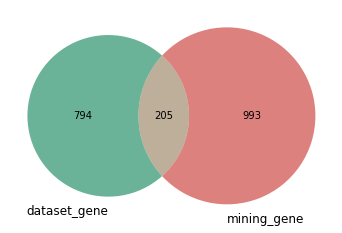

In [118]:
subset = {'10': 794, '01': 993, '11': 205}
venn2(subset,set_labels = ('dataset_gene', 'mining_gene'),
    alpha=0.6, set_colors=("#098154","#c72e29"))
plt.savefig("veen.png", dpi=800)
plt.show()